# Introduction

Nowadays, many people prefer to use online transportation services because it can reduce stress and someone can use that time to do other things. That is the rationale behind the formation of Uber and Lyft. Uber and Lyft are the ones that offer transportation services via mobile apps. Uber is a global company that's available in 69 countries and approximately 900 cities worldwide, while Lyft is available in approximately 644 cities in the US and 12 Cities in Canada. However, Lyft is the second largest online transportation company with a 31% market share in the US. In both applications, the prices that are offered always change. Based on this, an analysis is needed to determine the factors that influence the prices and to predict them using linear regression. Therefore, we use a dataset from [Kaggle](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) that contains information from Uber and Lyft applications. The dataset has 693071 rows and 57 columns. The models that are used for this project will be deployed using [Streamlit](https://darren7753-h8-3-pytn-kampusmerdeka-fp1-athifah-darrenapp-j7sk9x.streamlit.app/).

# Import Libraries

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use(["ggplot"])
pd.set_option("display.max.columns",None)

# Data Loading

Import *rideshare_kaggle.csv* as *df*.

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Cleaning

Check if there are *NaN* values within the dataframe.

In [3]:
df.isnull().sum()[df.isnull().sum() > 0]

price    55095
dtype: int64

Replace *NaN* values in the *price* column with its mean.

In [4]:
df["price"] = df["price"].fillna(df["price"].mean())

Drop irrelevant columns, such as:
- *id*: It's unique for every row
- *datetime*: It's already been represented by *hour*, *day*, and *month* columns
- *timestamp*: It's similar to *datetime* column
- *timezone*: There's only one timezone within the dataframe

In [5]:
df = df.drop(["id","timestamp","datetime","timezone"],axis=1)

Remove outliers in the *price* column with IQR (Interquartile Range) method.

In [6]:
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df_without_outliers = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

Find the correlation between numerical and categorical variables with the help of *dython* library.

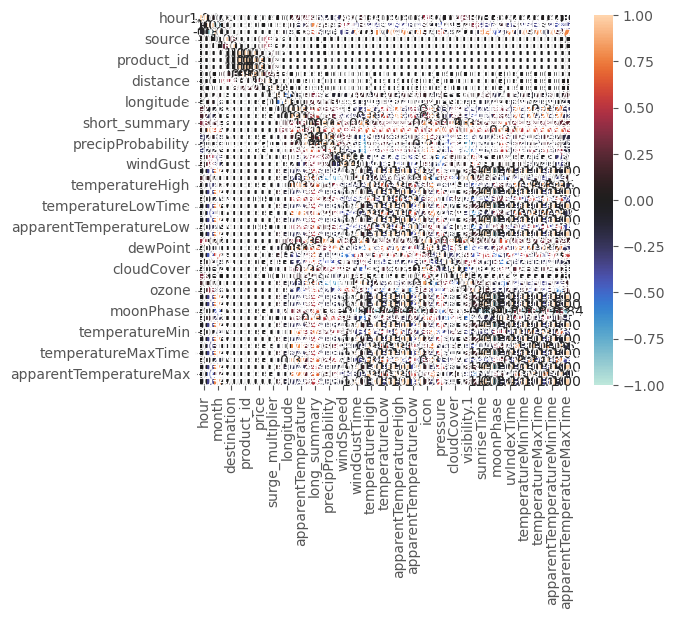

In [7]:
from dython.nominal import associations

corr = associations(df_without_outliers)

Because we want to know which features that affect the *price* the most and reduce the computational cost as well, we'll sort the correlation coefficients in descending order and take only the top 10. The $+$ and $-$ signs only indicate the direction of the linear relationship between two variables, thus we can sort by the absolute values of the correlation coefficients to make sorting easier.

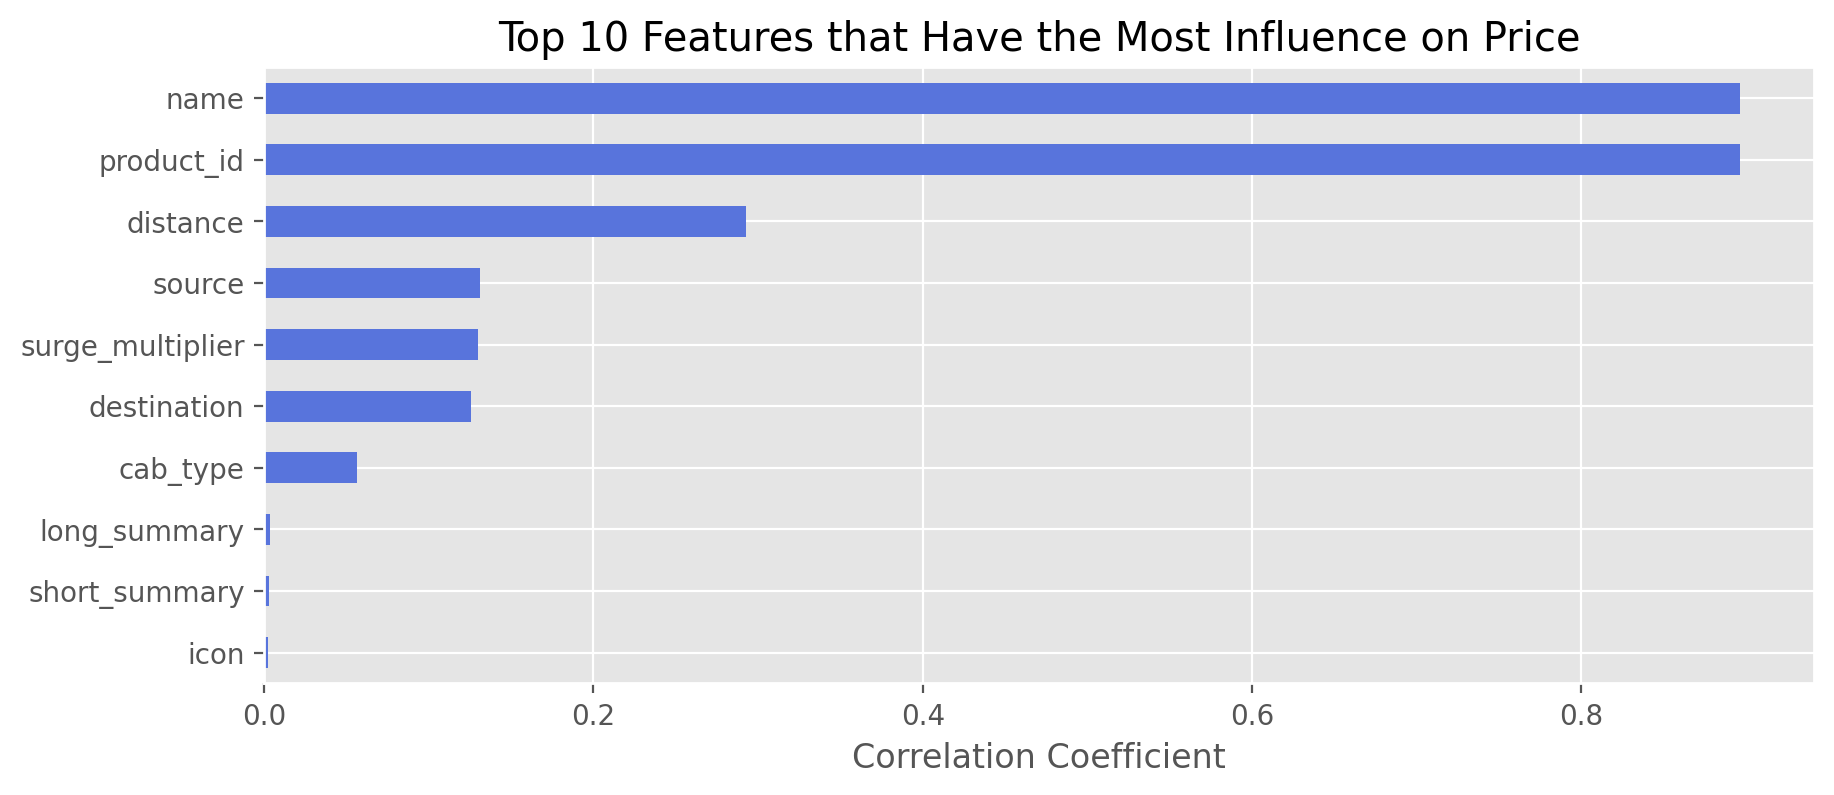

In [8]:
top_10_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(10)

fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Top 10 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

Since we've already known what the top 10 features that affect the *price* the most, we'll slice the dataframe based on those 10 features.

In [9]:
df_without_outliers = df_without_outliers[list(top_10_corr.index) + ["price"]]
df_without_outliers.head()

,product_id,name,distance,source,surge_multiplier,destination,cab_type,long_summary,short_summary,icon,price
0,lyft_line,Shared,0.44,Haymarket Square,1.0,North Station,Lyft,Rain throughout the day.,Mostly Cloudy,partly-cloudy-night,5.0
1,lyft_premier,Lux,0.44,Haymarket Square,1.0,North Station,Lyft,"Rain until morning, starting again in the eve...",Rain,rain,11.0
2,lyft,Lyft,0.44,Haymarket Square,1.0,North Station,Lyft,Light rain in the morning.,Clear,clear-night,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Haymarket Square,1.0,North Station,Lyft,Partly cloudy throughout the day.,Clear,clear-night,26.0
4,lyft_plus,Lyft XL,0.44,Haymarket Square,1.0,North Station,Lyft,Mostly cloudy throughout the day.,Partly Cloudy,partly-cloudy-night,9.0


# Data Exploration

Compare the average prices between the standard types of Uber and Lyft services, which are UberX and Lyft based on distance.

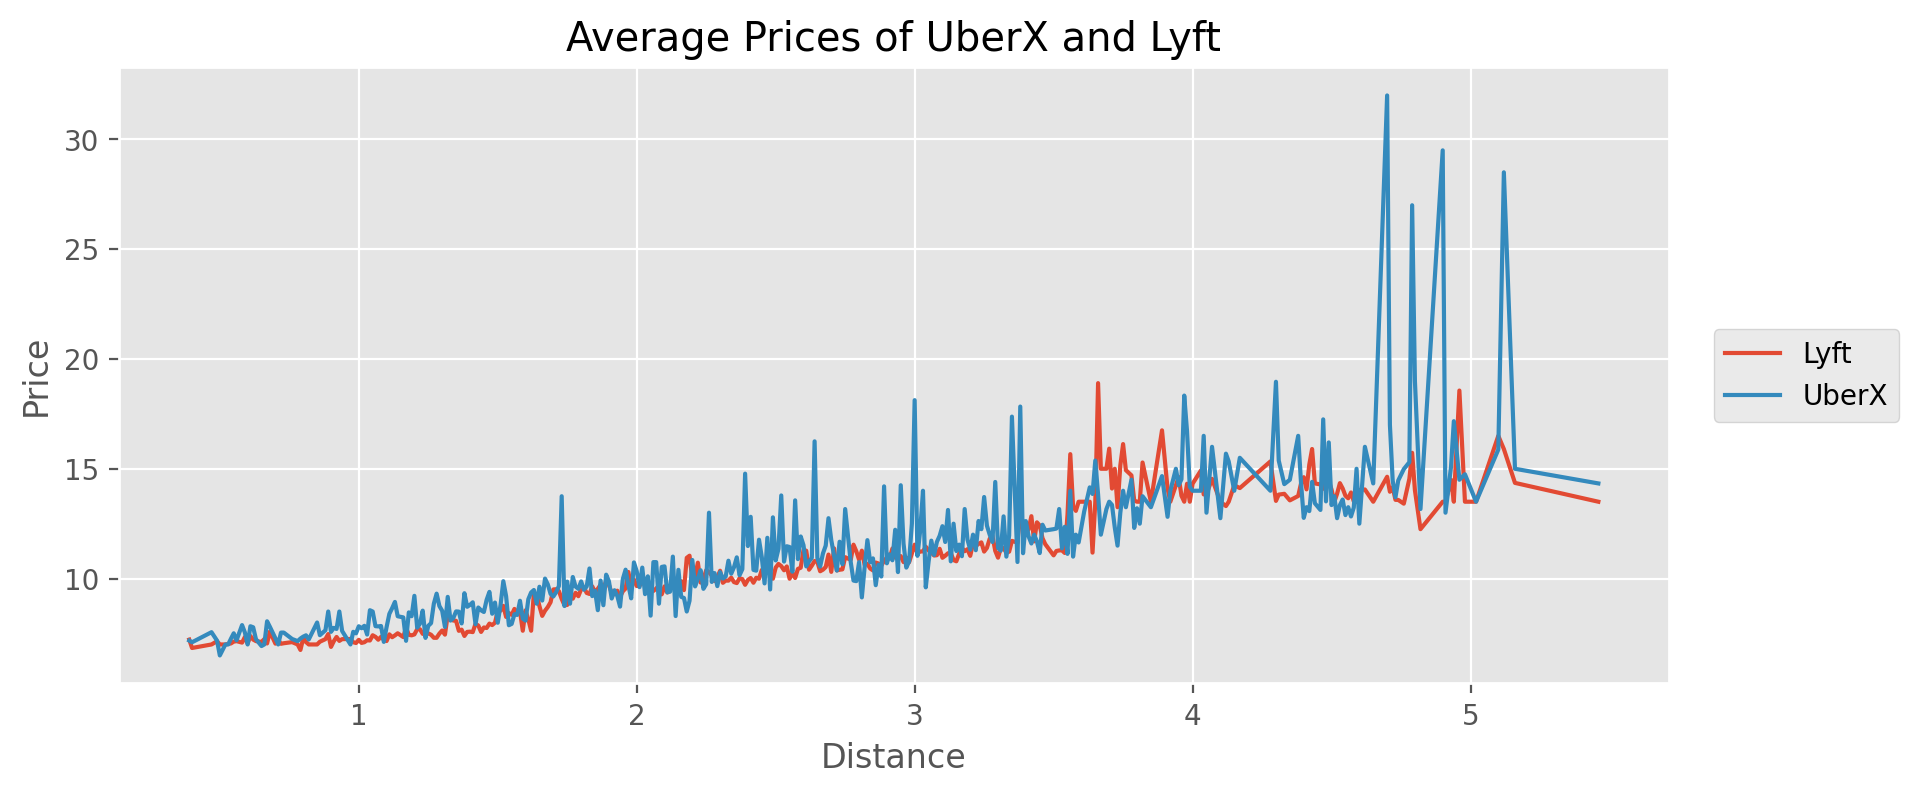

In [10]:
uberx_lyft_price_mean = df_without_outliers[
    (df_without_outliers["name"].isin(["UberX","Lyft"]))].groupby(["name","distance"]).mean()[["price"]
].reset_index()
uberx_lyft_price_mean = uberx_lyft_price_mean[
    uberx_lyft_price_mean["distance"].isin(
        set(
            list(uberx_lyft_price_mean[uberx_lyft_price_mean["name"] == "Lyft"]["distance"].unique())
        ).intersection(
            list(uberx_lyft_price_mean[uberx_lyft_price_mean["name"] == "UberX"]["distance"].unique())
        )
    )
]

plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=uberx_lyft_price_mean,x="distance",y="price",hue="name")
plt.title("Average Prices of UberX and Lyft")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

Calculate the percentages of the total prices based on the types of Uber and Lyft services.

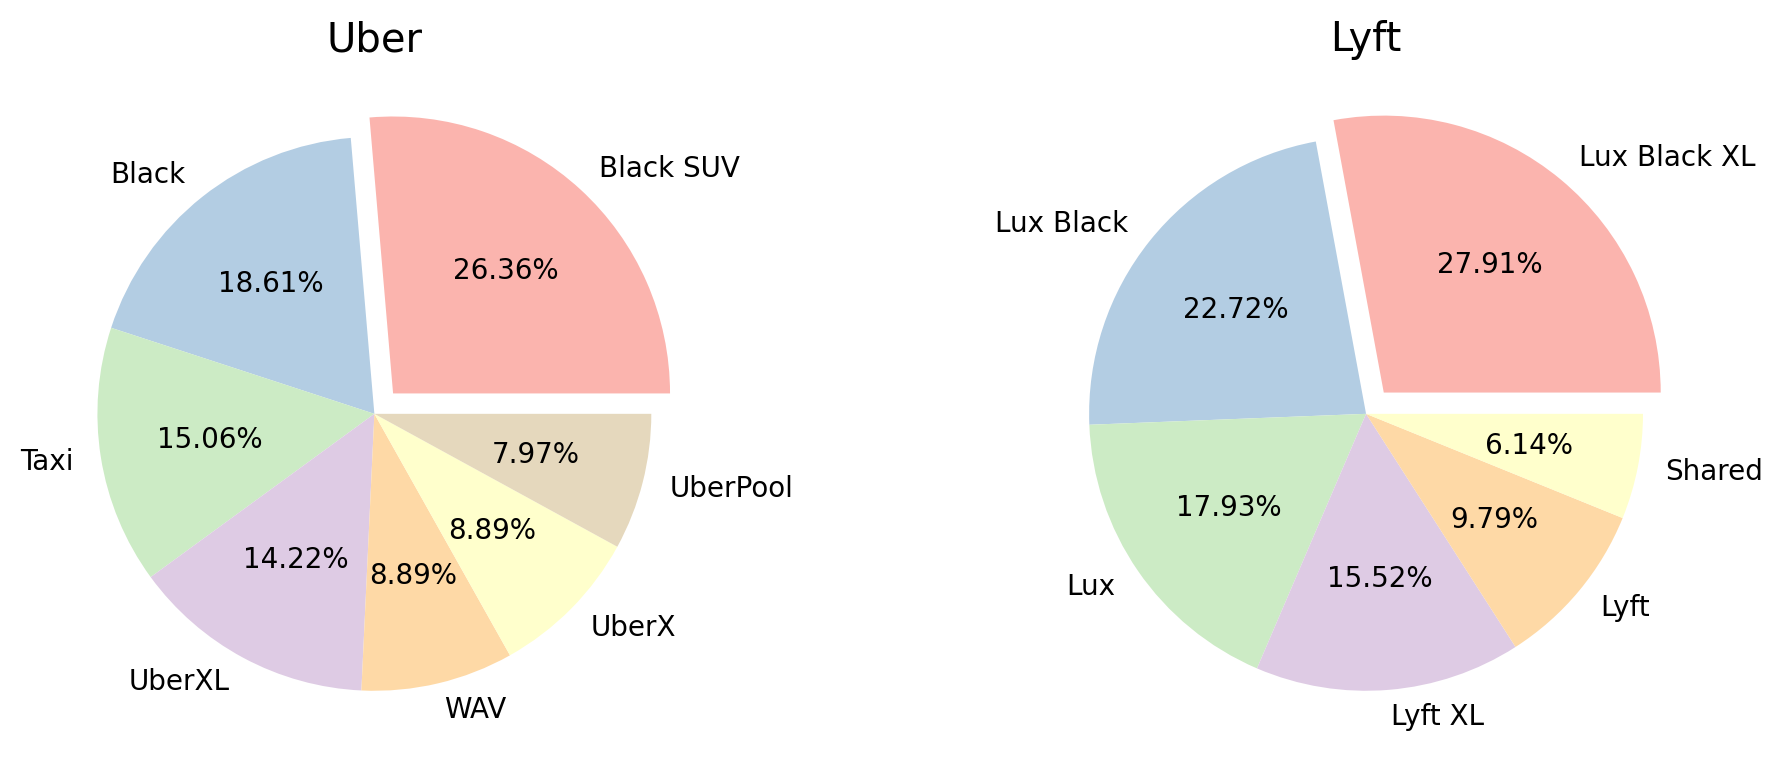

In [11]:
uber_name = df_without_outliers[df_without_outliers["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft_name = df_without_outliers[df_without_outliers["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber_name["price"],labels=uber_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[0].set_title("Uber")

ax[1].pie(lyft_name["price"],labels=lyft_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[1].set_title("Lyft")

plt.tight_layout()
plt.show()

# Data Preprocessing

Define independent (X) and dependent (y) variables.

Note: Due to there are categorical independent variables, those variables can be encoded with *LabelEncoder* first.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df_without_outliers.copy().drop("price",axis=1).apply(le.fit_transform)
y = df_without_outliers.copy()["price"]

Split the dataframe into training and testing sets with a ratio of 70:30.

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 479562
Testing dataset		: 205527


Due to every independent variable has different scales, we can standardize them with *StandardScaler*.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Models Definition & Training

First of all, let's try to create and train the basic linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(scaled_X_train,y_train)

LinearRegression()

Use the newly created linear regression model to predict the *price*.

In [16]:
base_pred = base_model.predict(scaled_X_test)

Evaluate the linear regression briefly with $R^{2}$ score. As it can be seen, it has an $R^{2}$ score of 0.525453. Since there's still room for improvement, let's try with a different model, such polynomial regression.

Note: We'll evaluate all of the models with more details using other metrics in the next section.

In [17]:
from sklearn.metrics import r2_score

r2_score(y_test,base_pred)

0.5140054785128719

Transform the independent variables for polynomial regression ($d=2$) model.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

Split and standardize the transformed independent variables.

In [19]:
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(poly_2_X,y,test_size=0.3,random_state=1221)

scaled_poly_2_X_train = scaler.fit_transform(poly_2_X_train)
scaled_poly_2_X_test = scaler.transform(poly_2_X_test)

Create and train the polynomial regression ($d=2$) model.

In [20]:
poly_2_model = LinearRegression()
poly_2_model.fit(scaled_poly_2_X_train,y_train)

LinearRegression()

Use the newly created polynomial regression ($d=2$) model to predict the price.

In [21]:
poly_2_pred = poly_2_model.predict(scaled_poly_2_X_test)

As it can be seen, the polynomial regression ($d=2$) model has an $R^{2}$ score of 0.756146.

In [22]:
r2_score(y_test,poly_2_pred)

0.751881084544497

Transform the independent variables for polynomial regression ($d=3$) model.

In [23]:
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

Split and standardize the transformed independent variables.

In [24]:
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.3,random_state=1221)

scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)

Create and train the polynomial regression ($d=3$) model.

In [25]:
poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

LinearRegression()

Use the newly created polynomial regression ($d=3$) model to predict the price.

In [26]:
poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)

As it can be seen, the polynomial regression ($d=3$) model has an $R^{2}$ score of 0.958053. To prevent overfitting, let's stop at $d=3$.

In [27]:
r2_score(y_test,poly_3_pred)

0.9563927854453934

# Models Evaluation

Evaluate the models using metrics as follows:
- $ MAE = \frac{1}{n}\sum\limits_{i=1}^n |y_{i} - \hat{y}_{i}| $
- $ RMSE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2} $
- $ R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i} - \bar{y}_{i})^2} $

Based on the plot below, it can be seen that the polynomial regression ($d=3$) model has the lowest MAE and RMSE and highest $R^2$ score.

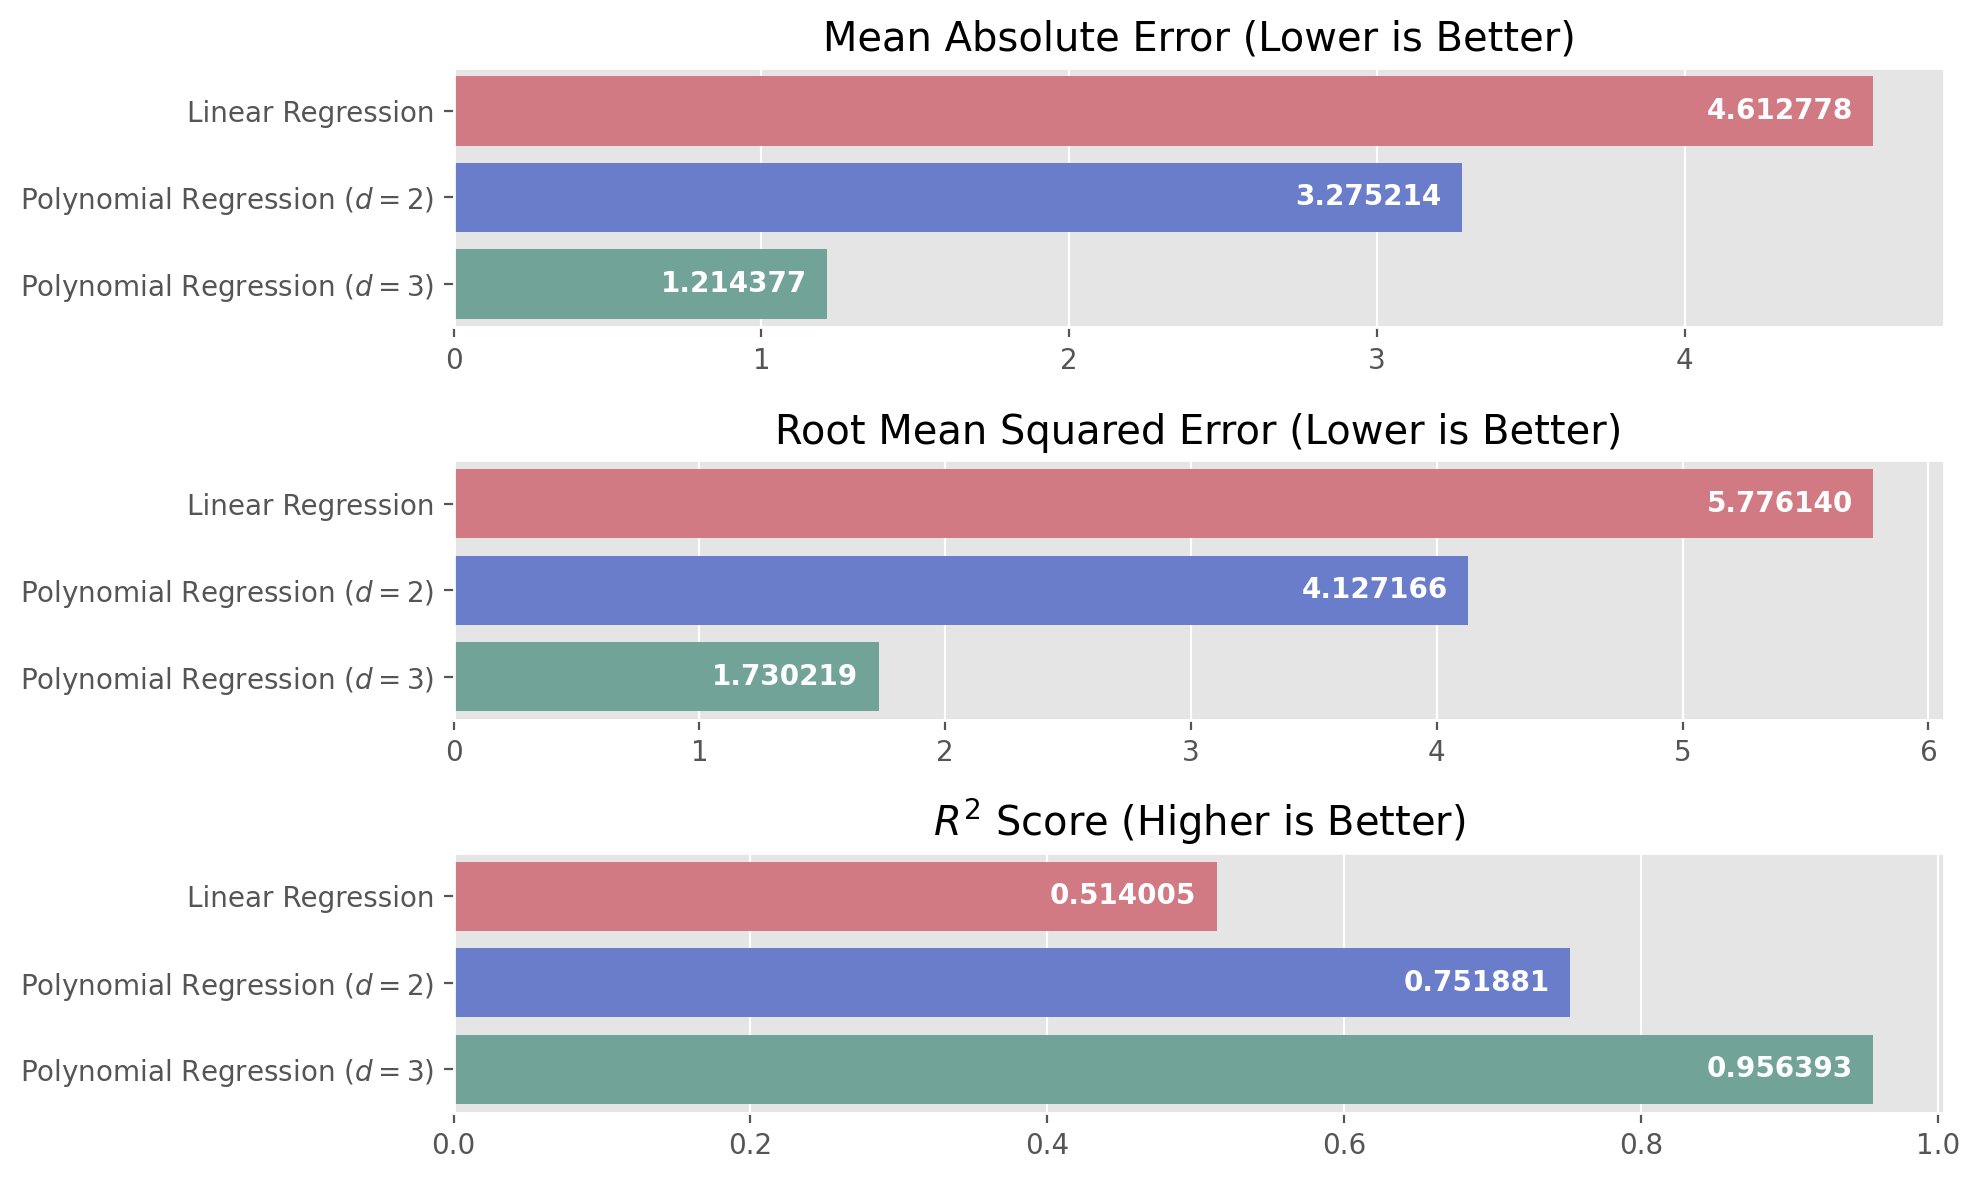

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,base_pred),mean_absolute_error(y_test,poly_2_pred),mean_absolute_error(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,base_pred)),np.sqrt(mean_squared_error(y_test,poly_2_pred)),np.sqrt(mean_squared_error(y_test,poly_3_pred))],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,base_pred),r2_score(y_test,poly_2_pred),r2_score(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

To visualize the comparison between the actual and prediction values of a multiple linear regression model, we can use a density plot. Based on the plot below, it can be seen that the polynomial regression ($d=3$) model has the most accurate prediction.

Reference: [Stack Overflow](https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib)

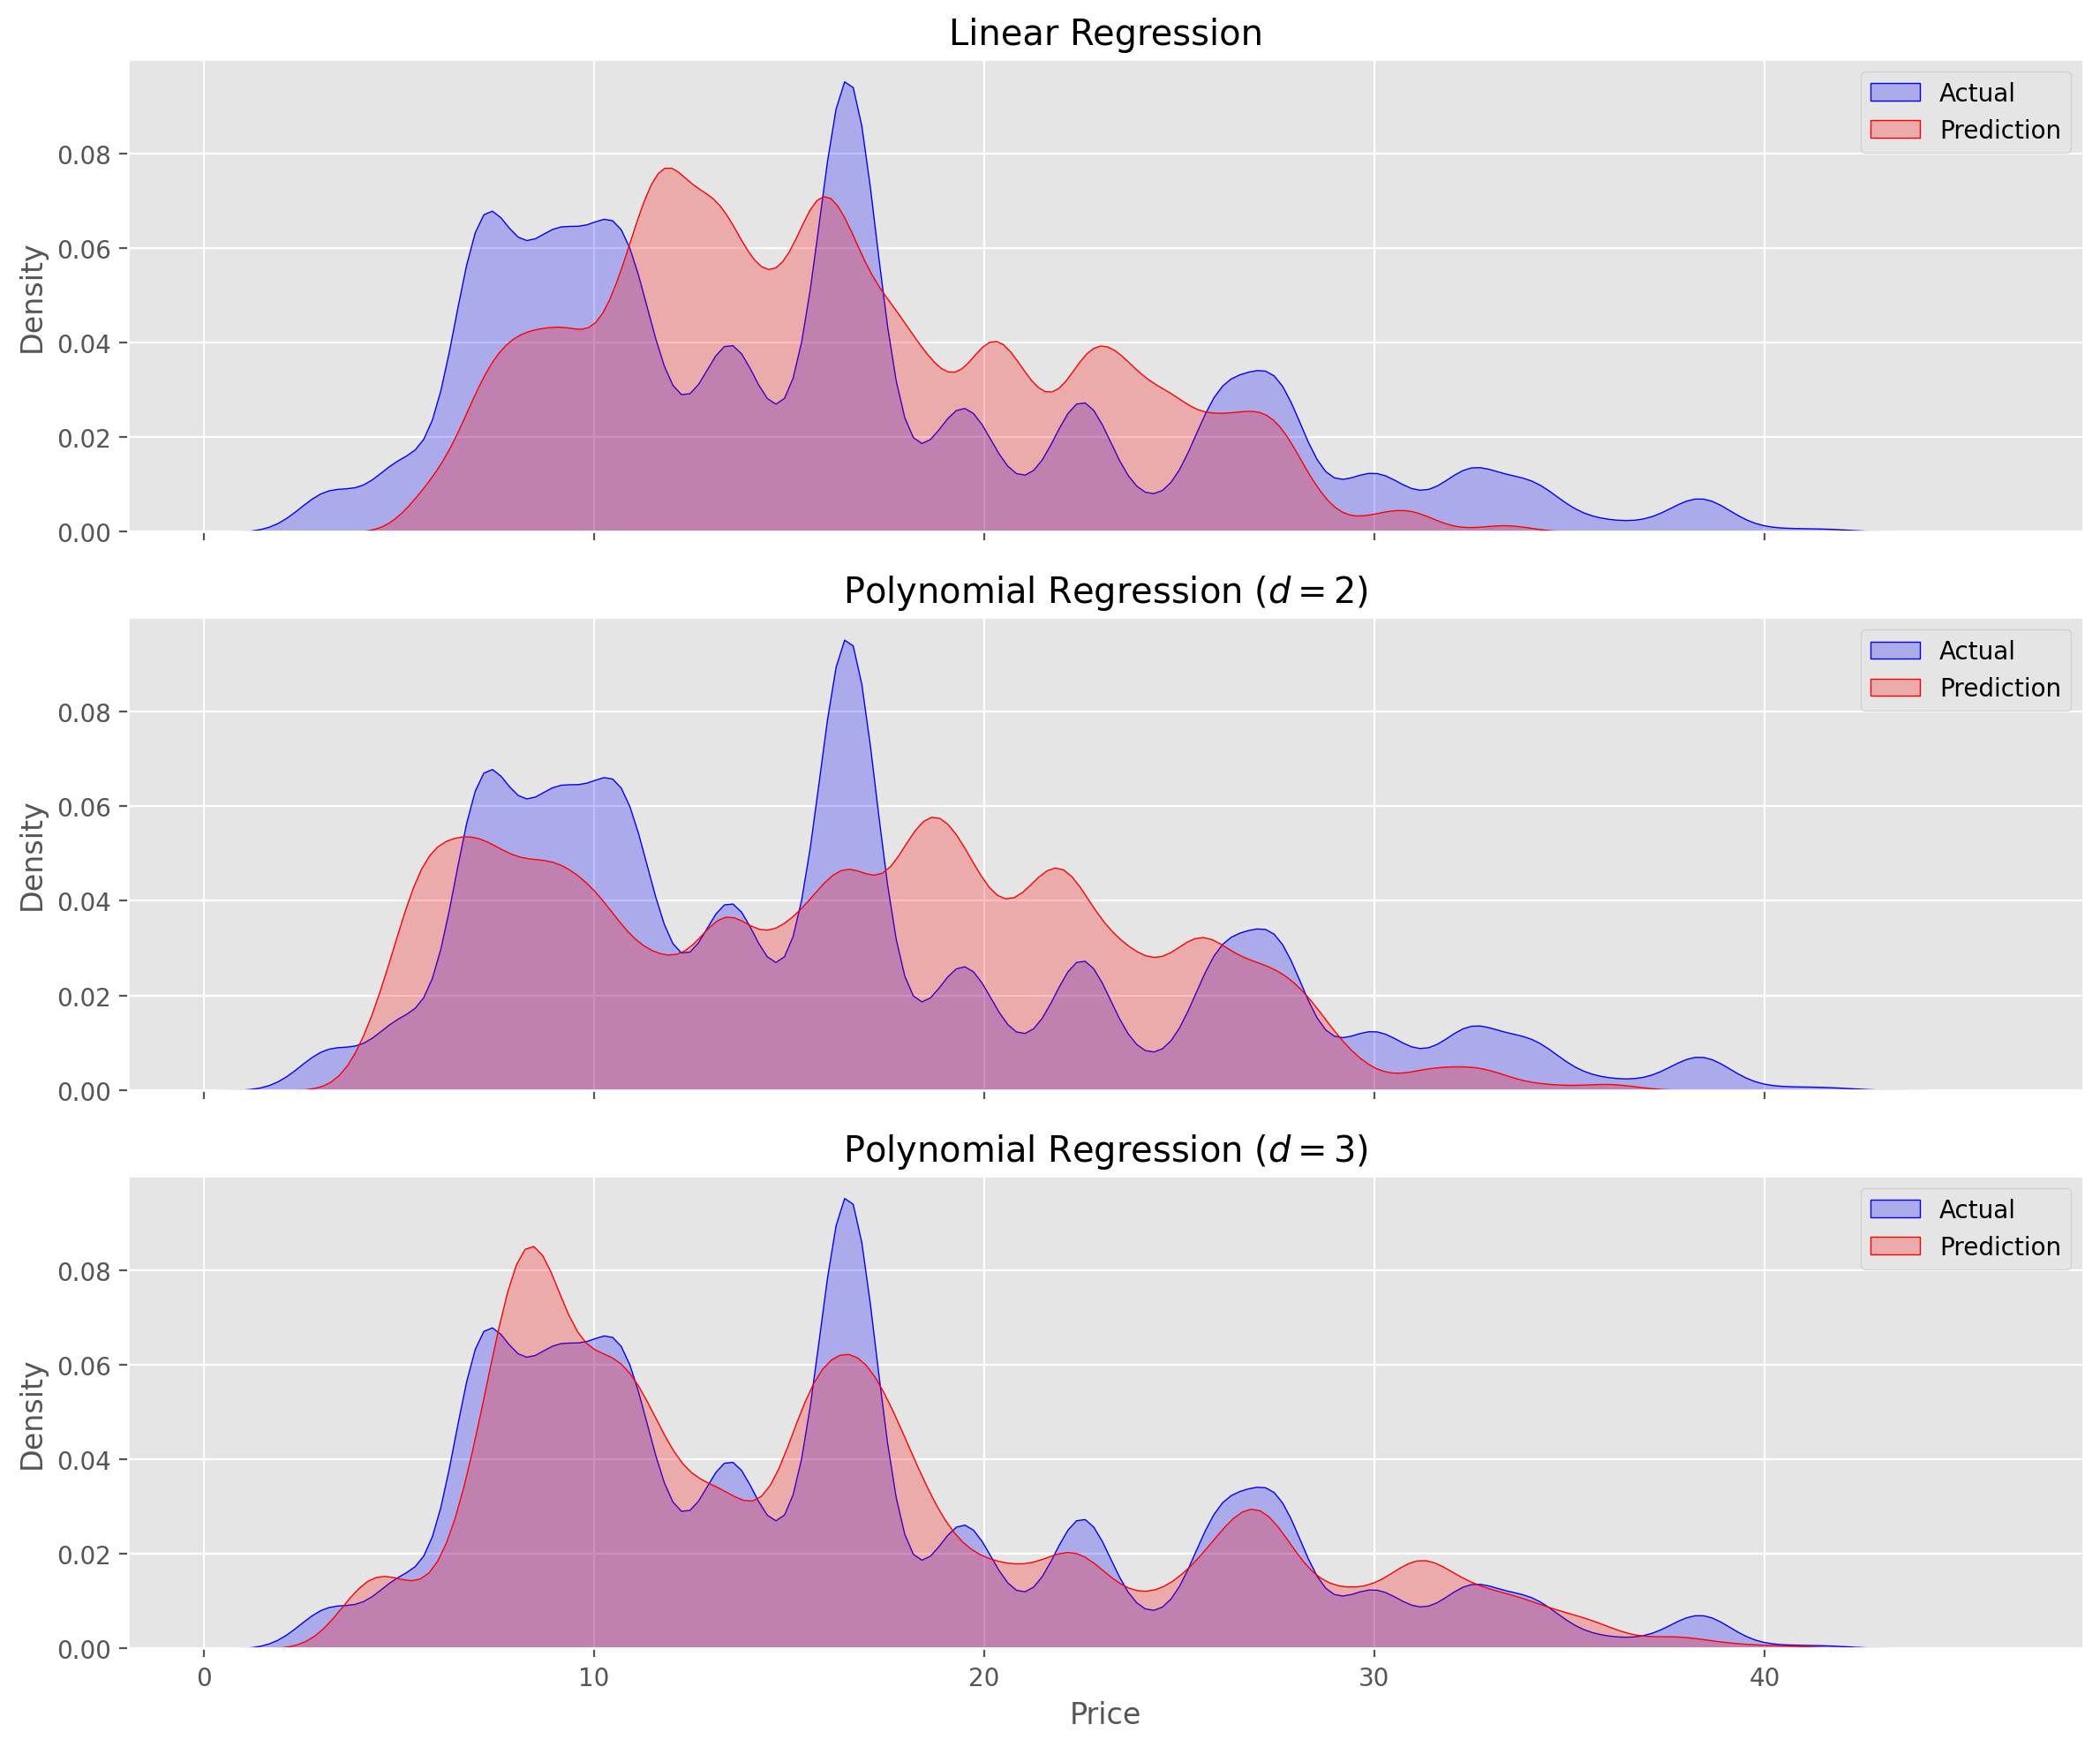

In [29]:
fig,ax = plt.subplots(figsize=(12,10),dpi=200,nrows=3,ncols=1,sharex=True)

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[0])
sns.kdeplot(base_pred,color="red",fill=True,label="Prediction",ax=ax[0])
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Price")
ax[0].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[1])
sns.kdeplot(poly_2_pred,color="red",fill=True,label="Prediction",ax=ax[1])
ax[1].set_title("Polynomial Regression $(d=2)$")
ax[1].set_xlabel("Price")
ax[1].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[2])
sns.kdeplot(poly_3_pred,color="red",fill=True,label="Prediction",ax=ax[2])
ax[2].set_title("Polynomial Regression $(d=3)$")
ax[2].set_xlabel("Price")
ax[2].legend(loc="upper right")

plt.tight_layout()
plt.show()

Put all of the predictions in a single dataframe to see the numbers clearly.

In [30]:
pd.DataFrame({
    "Actual":y_test,
    "Linear Regression Prediction":base_pred,
    "Polynomial Regression (d = 2) Prediction":poly_2_pred,
    "Polynomial Regression (d = 3) Prediction":poly_3_pred
}).reset_index(drop=True)

,Actual,Linear Regression Prediction,Polynomial Regression (d = 2) Prediction,Polynomial Regression (d = 3) Prediction
0,13.500000,14.436486,14.457681,13.515531
1,13.500000,14.413645,14.973835,13.649991
2,16.500000,17.920131,18.699607,18.094693
3,22.500000,20.486811,27.758213,25.699704
4,13.500000,20.107598,16.141437,13.388547
...,...,...,...,...
205522,16.545125,12.413725,14.110881,15.121640
205523,13.000000,9.342788,17.830044,15.021268
205524,34.000000,19.711089,25.120569,33.968137
205525,34.000000,18.850062,24.228053,32.819150


After all of the models have been evaluated, it's time to create the final models by retraining them with the whole dataframe. Let's start with the basic linear regression one and write its equation.

In [31]:
final_base_model = LinearRegression().fit(X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]
y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_base_model.intercept_,6)
for i in range(len(X.columns)):
    sums += x_symbol[i] * np.round(final_base_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 8.640229*(cabtype) + 0.01985*(destination) + 0.02329*(distance) + 0.001819*(icon) - 0.000536*(longsummary) - 1.562184*(name) + 0.763312*(productid) + 0.002166*(shortsummary) + 0.033258*(source) + 2.916092*(surgemultiplier) + 11.579941)

Create the final polynomial regression ($d=2$) model. As it can be seen, the model starts getting much more complex.

In [32]:
final_poly_2_model = LinearRegression().fit(poly_2_X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]

n = 1
x_symbol_ = []
for i in x_symbol:
    x_symbol_.append(i**2)
    for j in x_symbol[n:]:
        x_symbol_.append(i * j)
    n += 1
x_symbol = x_symbol + x_symbol_

y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_poly_2_model.intercept_,6)
for i in range(poly_2_X.shape[-1]):
    sums += x_symbol[i] * np.round(final_poly_2_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 48.37488*(cabtype)**2 - 0.027771*(cabtype)*(destination) + 0.00204*(cabtype)*(distance) + 0.004*(cabtype)*(icon) - 0.007178*(cabtype)*(longsummary) + 5.594547*(cabtype)*(name) - 20.692018*(cabtype)*(productid) + 0.004077*(cabtype)*(shortsummary) + 0.009669*(cabtype)*(source) + 48.37488*(cabtype) - 0.005813*(destination)**2 - 0.000372*(destination)*(distance) - 0.000516*(destination)*(icon) - 0.000187*(destination)*(longsummary) - 0.003874*(destination)*(name) - 0.000659*(destination)*(productid) + 0.000231*(destination)*(shortsummary) - 0.009458*(destination)*(source) + 0.006976*(destination)*(surgemultiplier) + 0.247904*(destination) - 8.0e-6*(distance)**2 + 4.0e-5*(distance)*(icon) - 2.5e-5*(distance)*(longsummary) - 0.001987*(distance)*(name) + 0.000644*(distance)*(productid) - 2.7e-5*(distance)*(shortsummary) - 0.00025*(distance)*(source) + 0.004066*(distance)*(surgemultiplier) + 0.038044*(distance) - 0.001832*(icon)**2 + 0.001004*(icon)*(longsummary) - 0.000394*(ic

Create the final polynomial regression ($d=3$) model. To reduce the computational cost, it's best to skip writing the equation for this one.

In [33]:
final_poly_3_model = LinearRegression().fit(poly_3_X,y)

Save all the final models for future use.

In [34]:
from joblib import dump

final_models = [final_base_model,final_poly_2_model,final_poly_3_model]
file_names = ["linear_regression","polynomial_2d_regression","polynomial_3d_regression"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

linear_regression.joblib has been saved successfully!
polynomial_2d_regression.joblib has been saved successfully!
polynomial_3d_regression.joblib has been saved successfully!


# Conclusion

Based on the analysis above, it can be concluded that the best model to predict the prices of Uber and Lyft transportation services is polynomial regression where $d=3$ since it has the lowest MAE and RMSE and highest $R^2$ score among other models. In addition, its prediction is close to the actual prices.